# Identify cause of excess dense water formation on the Weddell Sea continental shelf

In [3]:
import xarray as xr
import numpy as np
import gsw
import matplotlib.pyplot as plt
import glob
import sys
import cmocean
sys.path.append('/home/users/birgal/')
from nemo_python_git.grid import region_mask

In [5]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

In [6]:
year  = 1924
dictionary = {'x_grid_T':'x','y_grid_T':'y', 'x_grid_T_inner':'x','y_grid_T_inner':'y'}
mesh_mask = xr.open_dataset(f'{base_dir}bathymetry/mesh_mask-20250715.nc').squeeze()
domcfg    = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20250715.nc').squeeze()

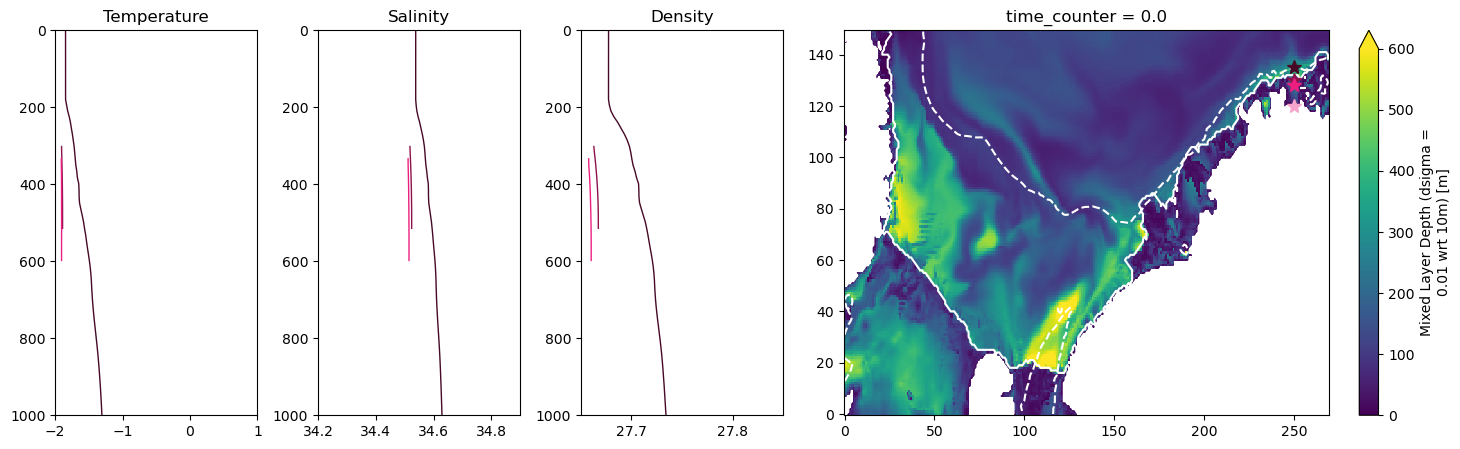

In [5]:
month= 5
xlocs  = [250, 250, 250, 250]
ylocs  = [135, 130, 128, 120]
colors = ['#460926', '#8d124c', '#ec1f80', '#f7a5cc']
fig, ax = plt.subplots(1,4,figsize=(18,5),gridspec_kw={'width_ratios': [1, 1, 1, 3]})
kwags1 = {'xlim':(-2,1)     , 'ylim':(1000,0), 'linewidth':1, 'y':'deptht', 'ax':ax[0]}
kwags2 = {'xlim':(34.2,34.9), 'ylim':(1000,0), 'linewidth':1, 'y':'deptht', 'ax':ax[1]}
kwags3 = {'xlim':(27.65, 27.85), 'ylim':(1000,0), 'linewidth':1, 'y':'deptht', 'ax':ax[2]}

# mixed layer depth plot
dsT.mldr10_1.isel(time_counter=month).where(mesh_mask.mbathy!=0).plot(ax=ax[3], vmin=0, vmax=600)
xr.plot.contour(mesh_mask.bathy_metry, ax=ax[3], levels=[1000], colors='w', linestyles='--')
xr.plot.contour(mesh_mask.misf, ax=ax[3], levels=[1], colors='w', linestyles='-')
for month in range(month, month+1):
    # profiles
    for c, color in enumerate(colors):
        T_profile = dsT.thetao.isel(time_counter=month,x=xlocs[c],y=ylocs[c]).where(mesh_mask.tmask.isel(x=xlocs[c],y=ylocs[c])!=0)
        S_profile = dsT.so.isel(time_counter=month,x=xlocs[c],y=ylocs[c]).where(mesh_mask.tmask.isel(x=xlocs[c],y=ylocs[c])!=0)
        rho       = gsw.density.sigma0(S_profile, T_profile)
        T_profile.plot(color=color, **kwags1)
        S_profile.plot(color=color, **kwags2)
        rho.plot(color=color, **kwags3)
        ax[3].plot([xlocs[c]],[ylocs[c]],'*',color=color, markersize=10)

ax[0].set_title('Temperature')
ax[1].set_title('Salinity')
ax[2].set_title('Density')
for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('');

In [15]:
FR_shelf_mask, _  = region_mask('filchner_ronne', domcfg, option='shelf')
FR_cavity_mask, _ = region_mask('filchner_ronne', domcfg, option='cavity')

In [43]:
# ds = xr.open_mfdataset(f'{base_dir}output/CESM2_t0_ens1011_monthly_3hwind_anglecorr_efr020_1920/files0/*grid_T*')
# ds = xr.open_mfdataset(f'{base_dir}output/ERA5_1h_tune0_efr020/files1/*grid_T*')
dsC = xr.open_mfdataset(f'{base_dir}output/CESM2_t0_ens1011_monthly_3hwind_anglecorr_efr020_1920/files0/*icemod*')
dsE = xr.open_mfdataset(f'{base_dir}output/ERA5_1h_tune0_efr020/files1/*icemod*')

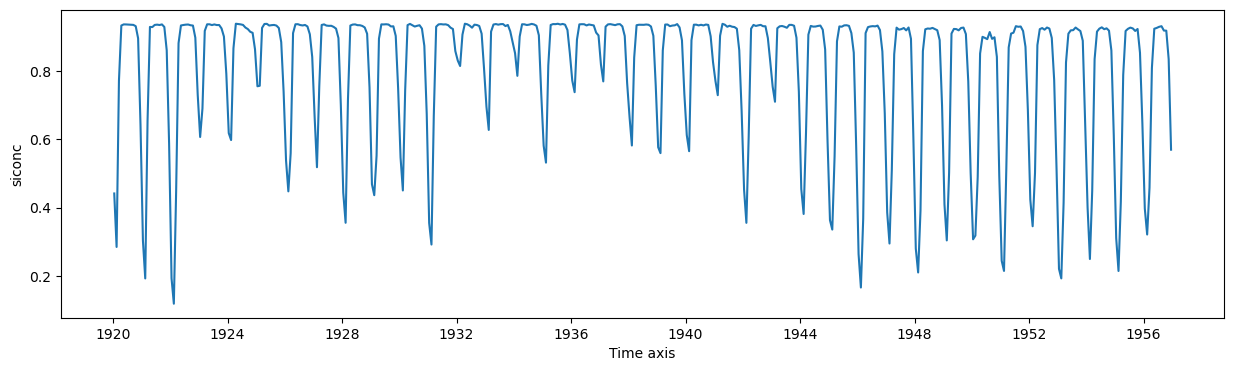

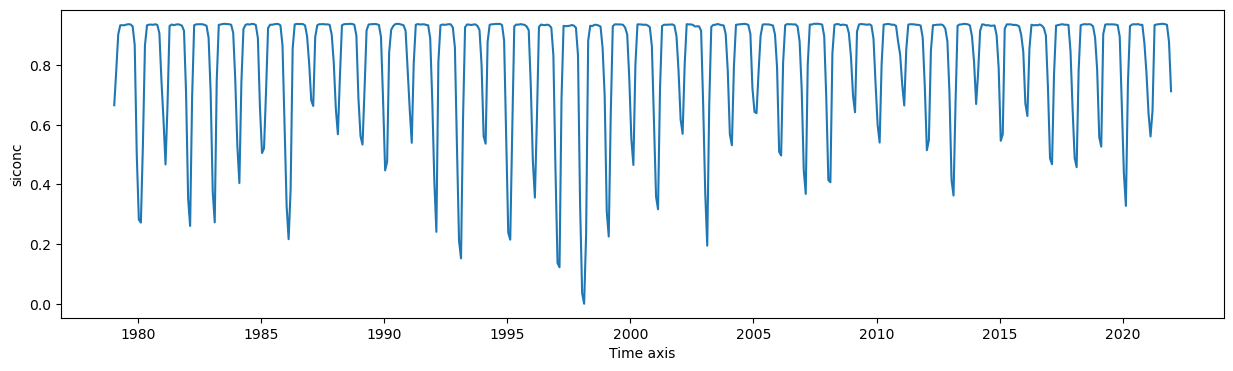

In [63]:
dsC.siconc.where(FR_shelf_mask).mean(dim=['x','y']).plot(figsize=(15,4))
dsE.siconc.where(FR_shelf_mask).mean(dim=['x','y']).plot(figsize=(15,4))

In [66]:
dsC

<xarray.Dataset> Size: 74GB
Dimensions:               (time_counter: 444, y: 453, x: 1440, nvertex: 4,
                           axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 3MB dask.array<chunksize=(453, 1440), meta=np.ndarray>
    nav_lon               (y, x) float32 3MB dask.array<chunksize=(453, 1440), meta=np.ndarray>
    time_centered         (time_counter) datetime64[ns] 4kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 4kB 1920-01-16T12:00:...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/60)
    bounds_nav_lon        (time_counter, y, x, nvertex) float32 5GB dask.array<chunksize=(12, 453, 1440, 4), meta=np.ndarray>
    bounds_nav_lat        (time_counter, y, x, nvertex) float32 5GB dask.array<chunksize=(12, 453, 1440, 4), meta=np.ndarray>
    area                  (time_counter, y, x) float32 1GB dask.array<chunksize=(12, 453, 1440), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] 7kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] 7kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    dmithd                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
    ...                    ...
    vfxsnw                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
    vfxbog                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
    vfxbom                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
    vfxlam                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
    vfxopw                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
    vfxdyn                (time_counter, y, x) float32 1GB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>
Attributes:
    name:         eANT025.L121_1m_19200101_19201231_icemod
    description:  ice variables
    title:        ice variables
    Conventions:  CF-1.6
    timeStamp:    2025-Oct-31 12:13:18 GMT
    uuid:         da3ccb7b-ef04-4483-965e-c31d03baea20

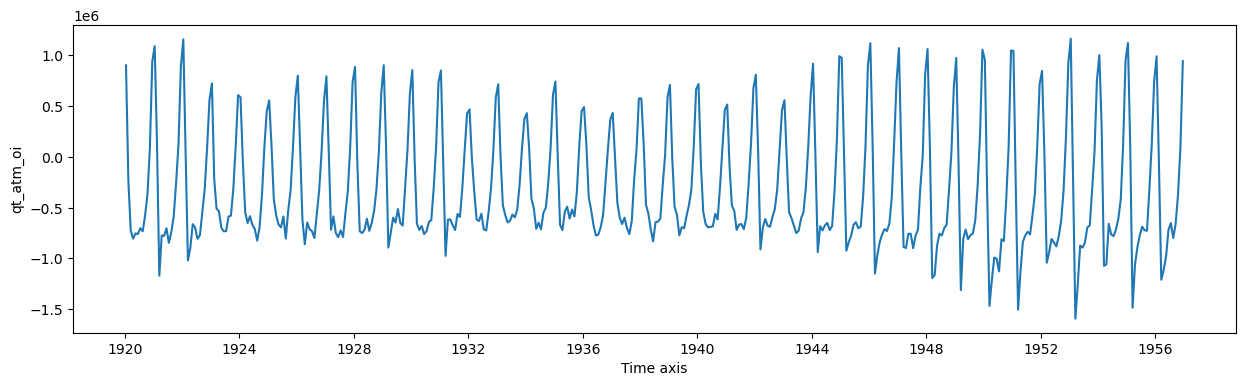

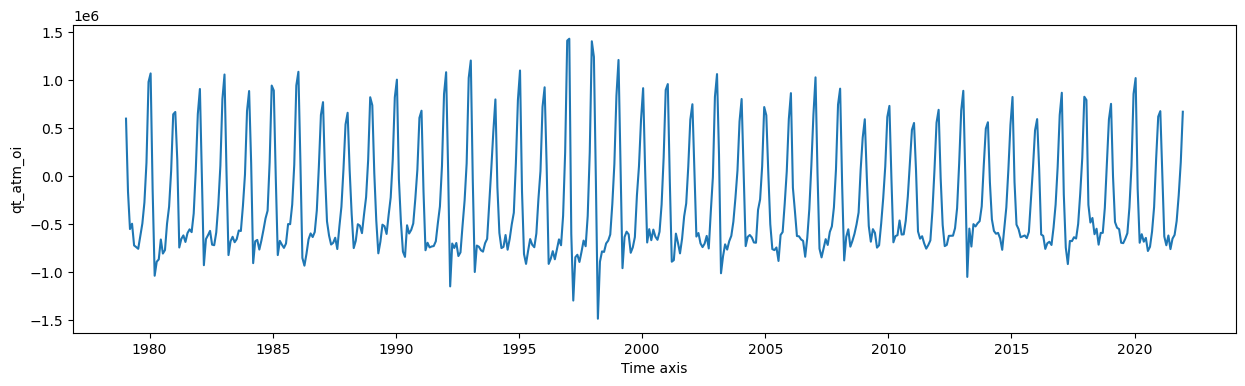

In [68]:
dsC.qt_atm_oi.where(FR_shelf_mask).sum(dim=['x','y']).plot(figsize=(15,4))
dsE.qt_atm_oi.where(FR_shelf_mask).sum(dim=['x','y']).plot(figsize=(15,4))

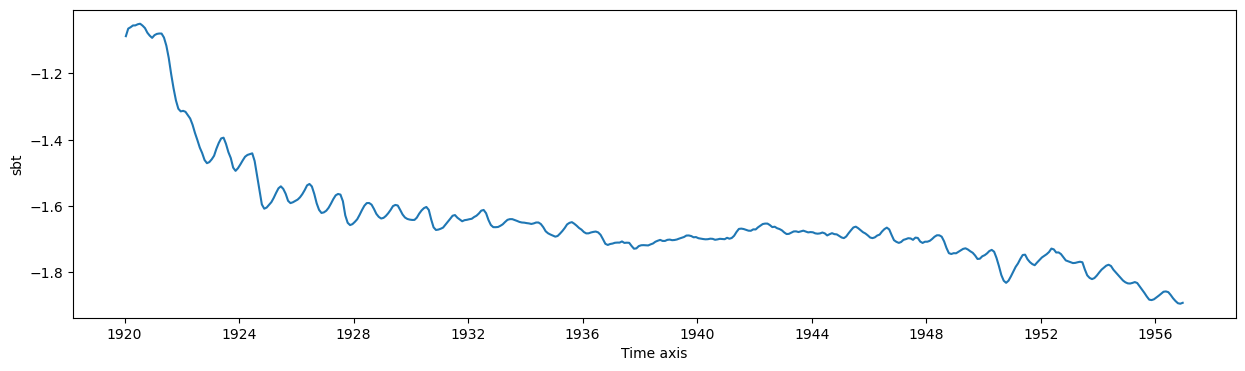

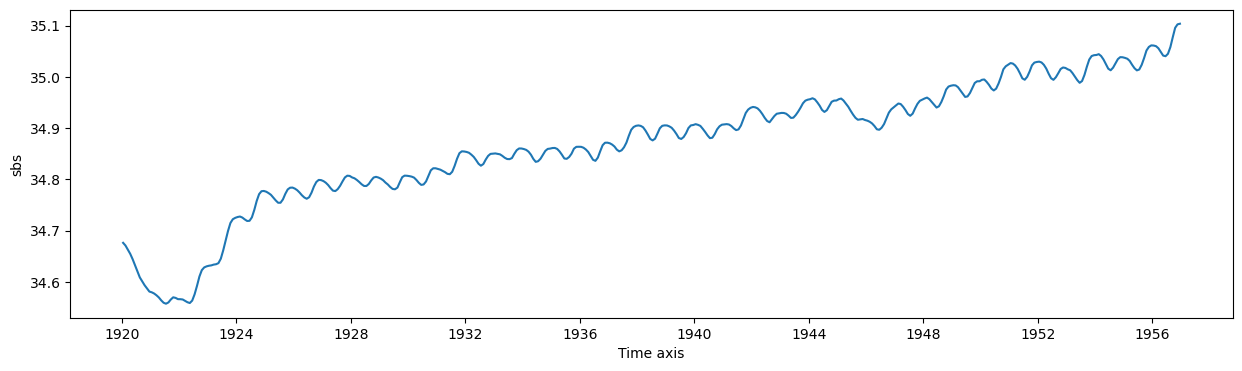

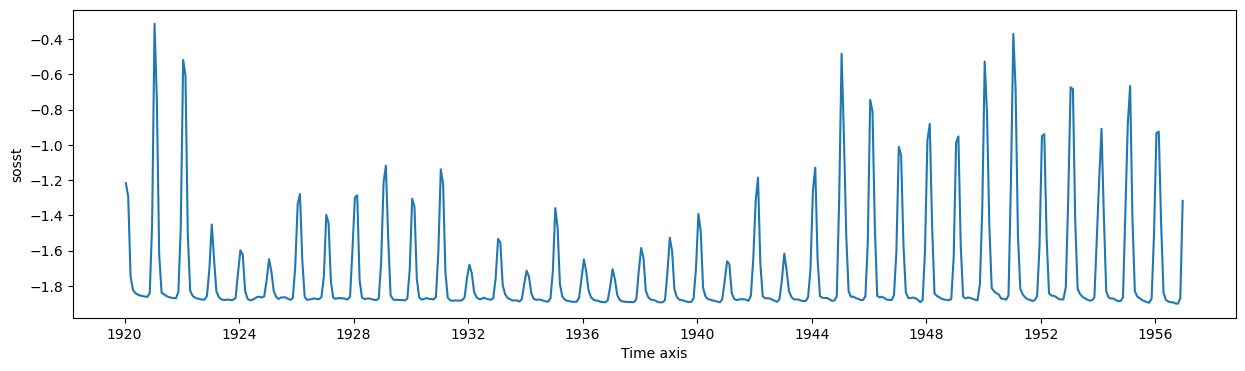

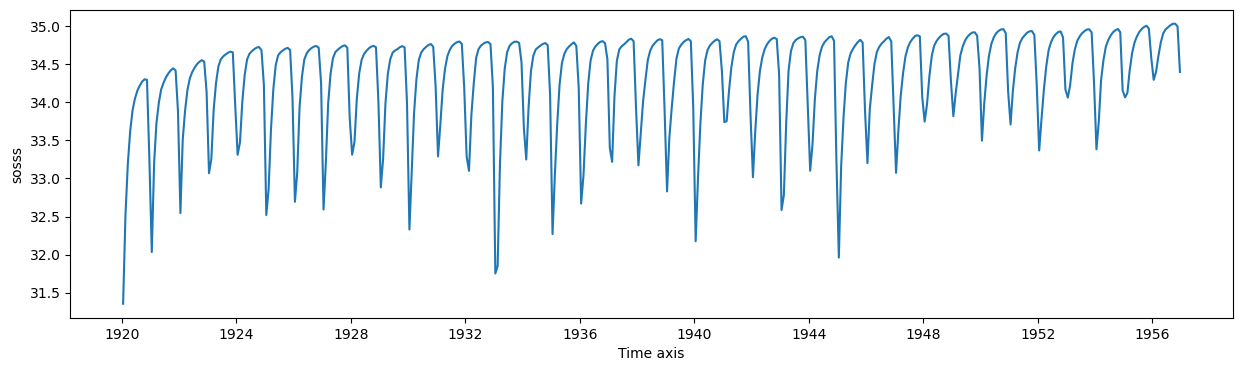

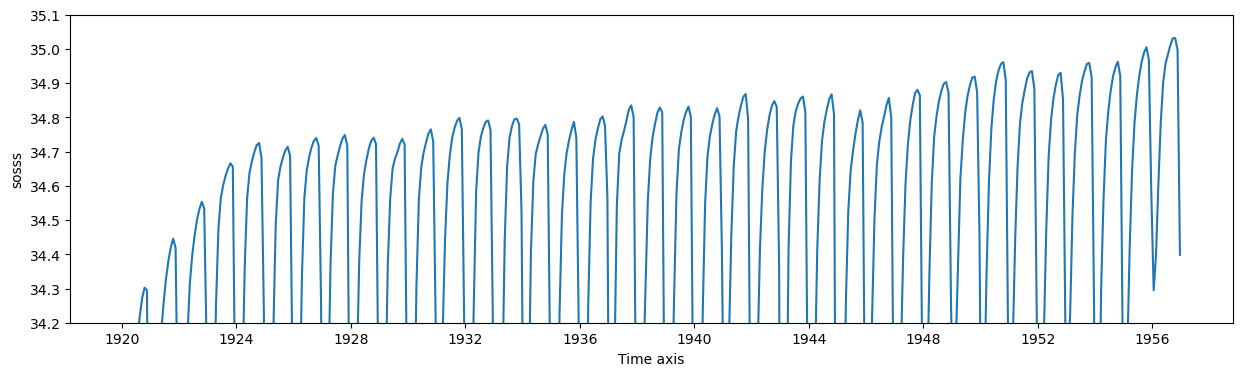

In [32]:
ds.sbt.rename({'x_grid_T_inner':'x','y_grid_T_inner':'y'}).where(FR_shelf_mask).mean(dim=['x','y']).plot(figsize=(15,4))
ds.sbs.rename({'x_grid_T_inner':'x','y_grid_T_inner':'y'}).where(FR_shelf_mask).mean(dim=['x','y']).plot(figsize=(15,4))
ds.sosst.rename({'x_grid_T':'x','y_grid_T':'y'}).where(FR_shelf_mask).mean(dim=['x','y']).plot(figsize=(15,4))
ds.sosss.rename({'x_grid_T':'x','y_grid_T':'y'}).where(FR_shelf_mask).mean(dim=['x','y']).plot(figsize=(15,4))
ds.sosss.rename({'x_grid_T':'x','y_grid_T':'y'}).where(FR_shelf_mask).mean(dim=['x','y']).plot(figsize=(15,4), ylim=(34.2,35.1))

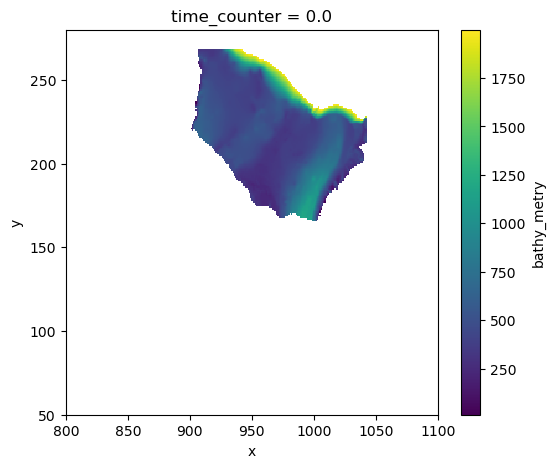

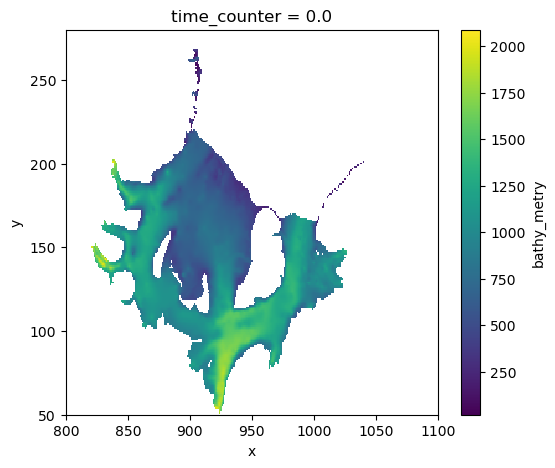

In [18]:
mesh_mask.bathy_metry.where(FR_shelf_mask).plot(xlim=(800,1100), ylim=(50, 280), figsize=(6,5))
mesh_mask.bathy_metry.where(FR_cavity_mask).plot(xlim=(800,1100), ylim=(50, 280), figsize=(6,5))